# Using Pycalphad:

## MATSE 410

### Matthew Feurer & Brandon Bocklund



Outline:
- Installation:
    - Anaconda
    - Pycalphad
- Introduction to pycalphad:
    - Opening a database
    - Looking at the contents of databases
    - Setting conditions and running equilibrium calculations
    - equalibrium() & calculate() functions
    - Plotting: $C_p$ vs T
- One component systems:
    - Pressure vs Temperature
    - Enthalpy vs Temperature
    - Entropy vs Tempurature
- Two Component Systems:
    - Molar Gibbs energy
    - Molar Gibbs Energy of Mixing
    - Enthalpy vs T
    - Energy surfaces
- plotting phase diagrams
    - Binary
    - Ternary
    - Triangular Projections

# Installation:

## Anaconda
Anaconda give you the tools you need to run and write python code. Python is the programming language in which pycalphad is written. This course will only cover the basics of python needed to do calculations in pycalphad. There are many sources online for learning to write code in python and I encourage you to look at these, and fimiliarize yourself with the language.

anaconda: https://www.anaconda.com/download/
#### Make sure that you select the option to add anaconda to your path variable when installing

#### Testing your Installation:
Go to your start menu. You should see several new applications installed, open up the application "Anaconda Prompt". this should open a command window. If you type conda commands they should work. Try typing "conda -h" which should print to the screen a help menu of commands.

## Pycalphad 
If Conda is already installed or you have just completed the installation of Anaconda it is time to install pycalphad. Doing so is easy and fast! 
#### If you're new to conda and python:
1. Go to your start menu and open up the application titled, "Anaconda Prompt". This should open up a command prompt window.
2. Paste the following:
    - "conda config --add channels conda-forge; conda config --add channels pycalphad; conda config --add channels msys2" then press enter
3. Now paste "conda install pycalphad" This should start the install and your screen will fill with different things as your computer is hard at work. You may have to select yes(y) when prompted.

#### If you have used conda/Python before and are fimiliar with virtual environments:
    https://pycalphad.org/docs/latest/INSTALLING.html
- note that this option is better if you plan on using python for other things in the future, you can always go back and rerinstall pycalphad in this way

# Introduction to Pycalphad:
This introduction will walk you through the basic steps of using Pycalphad (and python software). Then later in this guide we will show you examples of code combined and include useful ways of improving your calculations.
## Opening a Database
Any calculation in pycalphad requires you to define:
* A Database
* The components to consider (including 'VA' for vacancies)
* The phases to consider
* The conditions of the calculation

In python you need to import the tools that we use to preform our code. They act as additions to the basic python language. In general you can copy them as you see here without any modification. At the begining of any new session you must run these import statements to get all the tools we need. if the command below exicutes without any errors, your installation of pycalphad is succesfull.

In [1]:
from pycalphad import Database

When using the "Database()" command you can load a database. 
NOTE: the code below works only if your .TDB file is in the same file location as your jupyter notebook. In general you can also specify a full file path (ex: E:/Liturature/liturature for Ni database/Al-Co-Cr-Ni/mydb.TDB), this is usefull if your file is in a arbitrary folder.

In [2]:
db = Database('Cr-Fe-Ni.tdb')

## Looking at the Contents of Databases
Databases contain lots of information, much of which will help us set up calculations. Some useful things to look at are:
- the elements
- the phases
- the consituents of a particular phase

We can see all of these using the following commands:

In [3]:
# the print() command will output anything that is specified, it can be used with variables and text  
print("The elements contained in this database are:")
print(db.elements)                      #this prints the elements defined in the loaded database

print("The phases contained in this database are:")
print(list(db.phases.keys()))           #this prints the phases

print("The constituents of the SIGMA phase are:")
print(db.phases['SIGMA'].constituents)  #this prints the constituents of a specified phase


The elements contained in this database are:
{'FE', '/-', 'CR', 'NI', 'VA'}
The phases contained in this database are:
['LIQUID', 'BCC_A2', 'FCC_A1', 'HCP_A3', 'SIGMA']
The constituents of the SIGMA phase are:
(frozenset({'FE', 'NI'}), frozenset({'CR'}), frozenset({'FE', 'CR', 'NI'}))


## Setting Conditions & Running Equalibrium Calculations
In any thermodynamic calculation, $c+2$ conditions must be defined for $c$ components. In pycalphad, we always calculate molar quantites, with the implicit condition that $n=1$, so all calculations must have $c+1$ conditions specified.

Each condition, pressure, temperature and composition are accessed via by prepending the type with a "v.":

- **Pressure:** v.P in Pacals. Usually (but not always) thermodyanmic databases do not consider pressure. Standard pressure is 101325Pa by convention.
- **Temperature:** v.T in Kelvin. Most databases are only defined between 298.15 degrees and 6000 degress, so you should keep calculations in this range.
- **Composition:** v.X('NI') as a mole fraction (for Ni).

## The equalibrium() & calculate() Functions
In the following code and the following example we will be using the equilibrium() and calculate() tools. These functions require you to specify  a database, components, phases and conditions. You can also specify an output using keywords from the following list:

- Molar Enthalpy($H_M$) ------- 'HM'
- Mixing Enthalpy ------------- 'HM_mix'
- Molar Gibbs($G_M$) ----------- 'GM'
- Mixing Gibbs ----------------- 'GM_mix'
- Molar Entropy($S_M$) --------- 'SM'
- Heat Capacity($C_p$) --------- 'heat_capacity'
- Degree of Ordering -------- 'degree_of_ordering' or 'DOO'
- Molar Heat capacity-------- 'CPM'
- Mixing Heat Capacity------- 'CPM_MIX'
- Excess Mixing Energy------ 'excess_mixing_energy'
- Abstract Syntax Tree ------ 'ast'


In [4]:
from pycalphad import equilibrium
from pycalphad import variables as v

# Define components:
# Note: must have the correct capitialization.
# CALPHAD modelers usually use all-caps by convention.
# Also note that we include VA. Always do this.
components = ['CR', 'VA'] 

# Define the phases:
phases = ['LIQUID', 'BCC_A2', 'FCC_A1']

# And the conditions:
# This is a map of the variable to its value
conditions = {v.P: 101325, v.T: 500}

# do the equlibrium calculation and store the result in the `eq` variable
eq = equilibrium(db, components, phases, conditions)
print(eq)

<xarray.Dataset>
Dimensions:    (P: 1, T: 1, component: 1, internal_dof: 2, vertex: 1)
Coordinates:
  * P          (P) float64 1.013e+05
  * T          (T) float64 500.0
  * vertex     (vertex) int32 0
  * component  (component) <U2 'CR'
Dimensions without coordinates: internal_dof
Data variables:
    NP         (P, T, vertex) float64 1.0
    GM         (P, T) float64 -1.316e+04
    MU         (P, T, component) float64 -1.316e+04
    X          (P, T, vertex, component) float64 1.0
    Y          (P, T, vertex, internal_dof) float64 1.0 1.0
    Phase      (P, T, vertex) <U6 'BCC_A2'
Attributes:
    engine:   pycalphad 0.6.1
    created:  2018-03-07T15:53:07.300002


## Plotting: $C_p$ vs T
plotting is an important part of looking at data. graphing data in made easy with matplotlib. Here we will run through the steps above more briefly to calculate $C_p$ and plot the results. 
### Importing Libraries
Now that we know how to define variables lets try to calculate the heat capacity for cementite. first lets start by importing the libraries(tools) that we will need to do this calculation. Matplotlib will enable us to view our data in plots. It comes with a variety of tools for ploting and displaying data. Numpy adds math tools used in our calculations. By convention it is a good idea to put import statements at the top of your code.

In [5]:
# Only needed in a Jupyter Notebook
%matplotlib inline
import matplotlib
# Optional plot styling
matplotlib.style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
from pycalphad import Database, calculate

### Defining our TDB
Note that or database file is called "TDB" you can give variables any name we want, or even load multiple databases under different names, this holds true for most things in python. Ideally you should always load a database from a file. In this example we will be defining the database by writing it directly into our code. This is also a good opportunity to look at the structure of databases.

In [6]:
TDB = """
 ELEMENT C    GRAPHITE                   12.011     1054.0      5.7423 !
 ELEMENT FE   BCC_A2                     55.847     4489.0     27.2797 !
 TYPE_DEFINITION % SEQ * !
 TYPE_DEFINITION A GES AMEND_PHASE_DESCRIPTION @ MAGNETIC -3 0.28 !
 PHASE CEMENTITE_D011 %A 2 3 1 !
 CONSTITUENT CEMENTITE_D011 : FE : C : !
 PARAMETER  G(CEMENTITE_D011,FE:C;0) 0.01 +GFECEM; 6000 N !
 PARAMETER  TC(CEMENTITE_D011,FE:C;0) 0.01 485.00; 6000 N !
 PARAMETER  BMAGN(CEMENTITE_D011,FE:C;0) 0.01 1.008; 6000 N !
 FUNCTION GFECEM      0.01  +11369.937746-5.641259263*T-8.333E-6*T**4;
        43.00  Y  +11622.647246-59.537709263*T+15.74232*T*LN(T)
       -0.27565*T**2;
       163.00  Y  -10195.860754+690.949887637*T-118.47637*T*LN(T)
                  -0.0007*T**2+590527*T**(-1);
      6000.00  N !
"""
your_database = Database(TDB)

### Calculating
Now that we have loaded our database we can run calculations!!

For this we use the "calculate()" command. Using a database, in this case "your_database", we will be calculating heat_capacity in the Fe-C system for the Cementite phase (CEMENTITE_D011) between 1K-2000K with a step size of 0.5K.

In [7]:
result = calculate(your_database, ['FE', 'C'], 'CEMENTITE_D011', T=(1, 2000, 0.5), output='heat_capacity')

### Plotting
Below is just a small sample of the commands that can be used to plot using matplat lib. There are many other tools that change the appearence of the figures it generates, as well as commands that can save figures as images in various file formats. To learn more about matplot lib go here: https://matplotlib.org/index.html

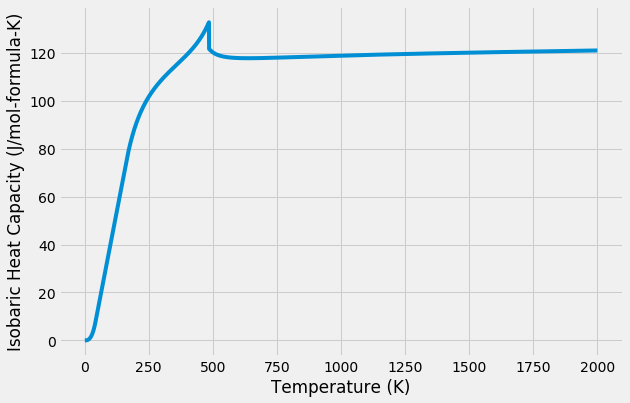

In [8]:
# Note: 4 moles of atoms per formula unit (Fe3C1). That's why we multiply times 4
fig = plt.figure(figsize=(9,6)) # plt is the alias we set for matplotlib 
fig.gca().set_xlabel('Temperature (K)')
fig.gca().set_ylabel('Isobaric Heat Capacity (J/mol-formula-K)')
fig.gca().plot(result['T'], np.squeeze(4.0 * result['heat_capacity']))
plt.show() # this command prints the plot out

# One Component Systems:

## P vs T

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad import Database, equilibrium, calculate, binplot
import pycalphad.variables as v

db = Database('zn.tdb')

phases = list(db.phases.keys())

#fig = plt.figure(figsize=(9,6))

#result=equilibrium(db, ['ZN', 'VA'], phases, {v.T: (400, 2500, 10), v.P:(100, 10000000, 100)})

#fig.gca().plot(result['T'], np.squeeze(result['P']))

#plt.show()

## Calculating Enthalpy($H_m$) vs T

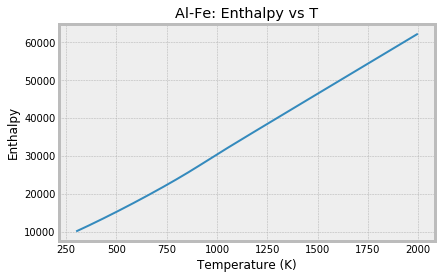

In [10]:
# First we will import matplotlib which will give us all the tools we need to plot figures
%matplotlib inline
import matplotlib
matplotlib.style.use('bmh') # Optional plot styling
import matplotlib.pyplot as plt

# numpy will give us some tools for working with arrays of numbers
import numpy as np

# Now to import the equalibrium, Databse and Model comands from Pycalphad
from pycalphad import equilibrium, Database, Model
import pycalphad.variables as v

database = Database('alfe_sei.TDB')
# If ever you are unsure include a vacancy ('VA') when defineing your components
components = ['AL', 'VA']
my_phases = ['B2_BCC']
conditions = {v.T: (300, 2000, 2), v.P: 101325}
Output = ['HM']
eq = equilibrium(database, components, my_phases, conditions, model=Model, output=Output)

# These ar all our plot settings
plt.gca().set_title('Al-Fe: Enthalpy vs T')
plt.gca().set_xlabel('Temperature (K)')
plt.gca().set_ylabel('Enthalpy')
# np.squeeze is used to remove all dimensions of size 1
# For a 1-D/"step" calculation, this aligns the temperature and Enthalpy arrays
# In 2-D/"map" calculations, we'd have to explicitly select the composition of interest
plt.plot(eq['T'].values, np.squeeze(eq['HM'].values))
plt.show()

# Calculating $S_M$ vs T
We can start to see that by changing the variable type in the code we can calculate any one of the quantities listed above (under using the calculate() & equalibrium() functions). Compare the code with that of enthalpy and see that very little needs to be changed.

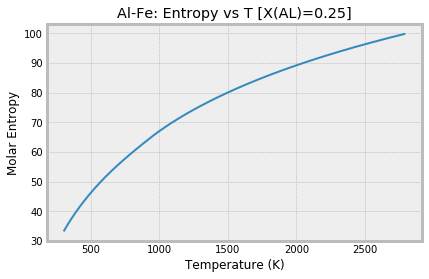

In [11]:
# First we will import matplotlib which will give us all the tools we need to plot figures
%matplotlib inline
import matplotlib
matplotlib.style.use('bmh') # Optional plot styling
import matplotlib.pyplot as plt

# numpy will give us some tools for working with arrays of numbers
import numpy as np

# Now to import the equalibrium, Databse and Model comands from Pycalphad
from pycalphad import equilibrium, Database, Model
import pycalphad.variables as v

database = Database('alfe_sei.TDB')
# If ever you are unsure include a vacancy ('VA') when defineing your components
components = ['AL', 'VA']
my_phases = ['B2_BCC']
conditions = { v.T: (300, 2800, 4), v.P: 101325}
Output = ['SM']
eq = equilibrium(database, components, my_phases, conditions, model=Model, output=Output)

# These ar all our plot settings
plt.gca().set_title('Al-Fe: Entropy vs T [X(AL)=0.25]')
plt.gca().set_xlabel('Temperature (K)')
plt.gca().set_ylabel('Molar Entropy')
# np.squeeze is used to remove all dimensions of size 1
# For a 1-D/"step" calculation, this aligns the temperature and Enthalpy arrays
# In 2-D/"map" calculations, we'd have to explicitly select the composition of interest
plt.plot(eq['T'].values, np.squeeze(eq['SM'].values))
plt.show()

# Two Component Systems:
## Plotting Gibbs Energy vs T

Now that we have seen some of the basics of using pycalphad with python, lets see how python can help us to save time and make our code more robust. In the following code we will used the database/phases/components we defined in our code for equalibrium calculations, so if you have not run that cell please do so before running the following.

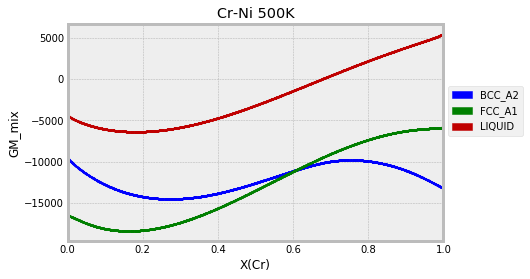

In [21]:
%matplotlib inline
from pycalphad import calculate, Database
from pycalphad.plot.utils import phase_legend
import matplotlib.pyplot as plt
import numpy as np

db = Database('Cr-Fe-Ni.tdb')
components = ['CR', 'NI', 'VA'] 
phases = ['LIQUID', 'BCC_A2', 'FCC_A1']
temp = 500 #defining variables that are changed frequently and called often saves time

# this chunk of code sets up the appearence of our figure
legend_handles, colorlist = phase_legend(sorted(phases))
fig = plt.figure()
ax = fig.gca()
ax.set_title('Cr-Ni {}K'.format(temp))
ax.set_ylabel('GM_mix')
ax.set_xlabel('X(Cr)')

# in python we can do many repetitive things at once using the for loop,
# which writes a new phase from the lift of phases every loop 
for phase in phases:
    result = calculate(db, components, phase, T=temp, P=101325,  output='GM')
    ax.scatter(result.X.sel(component='CR'), result.GM,
               marker='.', s=5, color=colorlist[phase.upper()])
ax.set_xlim((0, 1))
ax.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.6))

## Plotting Gibbs Mixing Energy vs T

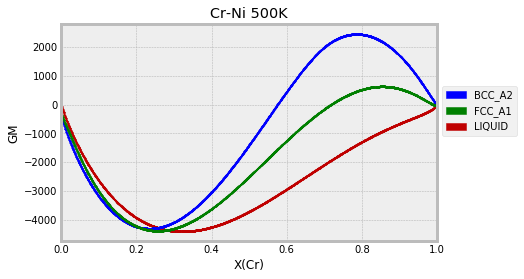

In [24]:
%matplotlib inline
from pycalphad import calculate
#from pycalphad import variables as v
from pycalphad.plot.utils import phase_legend
import matplotlib.pyplot as plt
import numpy as np

db = Database('Cr-Fe-Ni.tdb')
components = ['CR', 'NI', 'VA'] 
phases = ['LIQUID', 'BCC_A2', 'FCC_A1']
temp = 500 #defining variables that are changed frequently and called often saves time

# this chunk of code sets up the appearence of our figure
legend_handles, colorlist = phase_legend(sorted(phases))
fig = plt.figure()
ax = fig.gca()
ax.set_title('Cr-Ni {}K'.format(temp))
ax.set_ylabel('GM')
ax.set_xlabel('X(Cr)')

# in python we can do many repetitive things at once using the for loop,
# which writes a new phase from the lift of phases every loop 
for phase in phases:
    result = calculate(db, components, phase, T=temp, P=101325, output='GM_MIX')
    ax.scatter(result.X.sel(component='CR'), result.GM_MIX,
               marker='.', s=5, color=colorlist[phase.upper()])
ax.set_xlim((0, 1))
ax.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.6))

## Enthalpy vs T

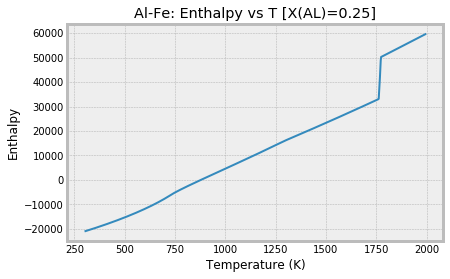

In [30]:
## First we will import matplotlib which will give us all the tools we need to plot figures
%matplotlib inline
import matplotlib
matplotlib.style.use('bmh') # Optional plot styling
import matplotlib.pyplot as plt

# numpy will give us some tools for working with arrays of numbers
import numpy as np

# Now to import the equalibrium, Databse and Model comands from Pycalphad
from pycalphad import equilibrium, Database, Model
import pycalphad.variables as v

database = Database('alfe_sei.TDB')
# If ever you are unsure include a vacancy ('VA') when defineing your components
components = ['AL', 'FE', 'VA']
my_phases = ['LIQUID', 'B2_BCC']
conditions = {v.X('AL'): 0.25, v.T: (300, 2000, 2), v.P: 101325}
Output = ['HM']
eq = equilibrium(database, components, my_phases, conditions, model=Model, output=Output)

# These ar all our plot settings
plt.gca().set_title('Al-Fe: Enthalpy vs T [X(AL)=0.25]')
plt.gca().set_xlabel('Temperature (K)')
plt.gca().set_ylabel('Enthalpy')
# np.squeeze is used to remove all dimensions of size 1
# For a 1-D/"step" calculation, this aligns the temperature and Enthalpy arrays
# In 2-D/"map" calculations, we'd have to explicitly select the composition of interest
plt.plot(eq['T'].values, np.squeeze(eq['HM'].values))
plt.show()

## Calculating Energy Surfaces
It is very common in CALPHAD modeling to directly examine the Gibbs energy surface of all the constituent phases in a system.

Below we show how the Gibbs energy of all phases may be calculated as a function of composition at a given temperature (2800 K).

Note that the chi phase has additional, internal degrees of freedom which allow it to take on multiple states for a given overall composition. Only the low-energy states are relevant to calculating the equilibrium phase diagram.

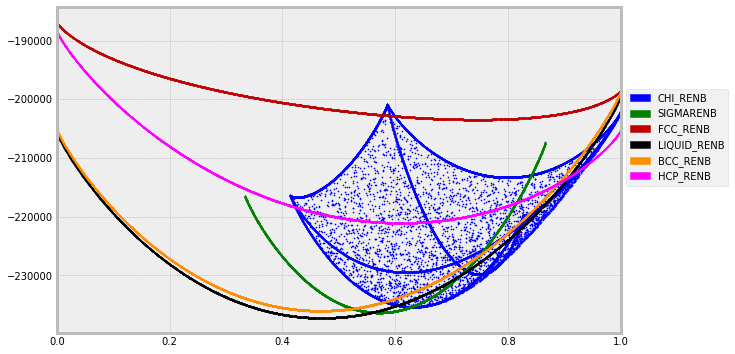

In [25]:
from pycalphad import calculate
from pycalphad.plot.utils import phase_legend
import numpy as np

db_nbre = Database('nbre_liu.tdb')
my_phases_nbre = ['CHI_RENB', 'SIGMARENB', 'FCC_RENB', 'LIQUID_RENB', 'BCC_RENB', 'HCP_RENB']

legend_handles, colorlist = phase_legend(my_phases_nbre)

fig = plt.figure(figsize=(9,6))
ax = fig.gca()
for name in my_phases_nbre:
    result = calculate(db_nbre, ['NB', 'RE'], name, P=101325, T=2800, output='GM')
    ax.scatter(result.X.sel(component='RE'), result.GM,
               marker='.', s=5, color=colorlist[name.upper()])
ax.set_xlim((0, 1))
ax.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.6))
plt.show()



# Plotting Phase Diagrams:
## Binary Phase Diagrams
Finally we would like to create phase diagrams from our .TDB files. Luckily this too is a feature in pycalphad. This can be done using the binplot() command. Calculating phase diagrams can be time consuming depending on the number of points in your calculation and may take anywhere between several minutes and several hours. In upcoming versions of the software this speed will likely improve so look for updates. The settings below have been set to run phase diagrams quickly with large step sizes.

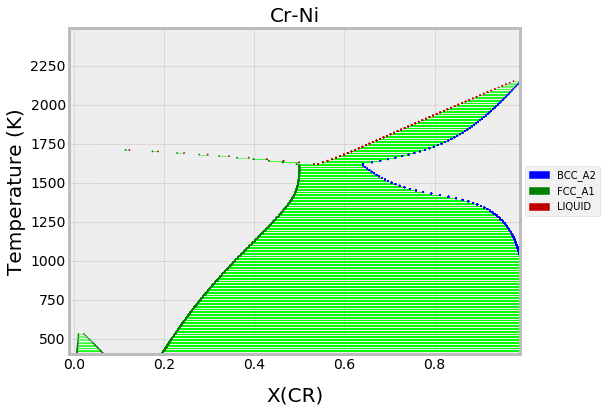

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad import Database, binplot
import pycalphad.variables as v

db = Database('Cr-Fe-Ni.tdb')

phases = list(db.phases.keys())
fig = plt.figure(figsize=(9,6))
binplot(db, ['NI', 'CR', 'VA'], phases, {v.X('CR'):(0,1,0.02),v.T: (400, 2500, 10),v.P:101325},  ax=fig.gca())
plt.show()    

## Ternary Phase Diagrams
similar in the way that binary phase diagram can be created using the binplot() we can use the command ternplot() to make ternary phase diagrams.

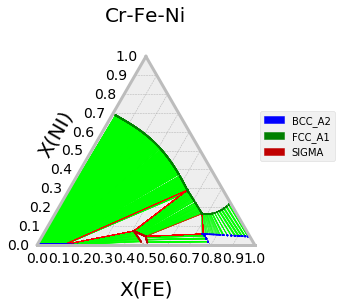

In [27]:
%matplotlib inline
from pycalphad import Database, ternplot
from pycalphad import variables as v

db = Database('Cr-Fe-Ni.tdb')
comps = ['CR', 'FE', 'NI', 'VA']
phases = list(db.phases.keys())
conds = {v.T: 830, v.P:101325, v.X('FE'): (0,1,0.015), v.X('NI'): (0,1,0.015)}

ternplot(db, comps, phases, conds, x=v.X('FE'), y=v.X('NI'))

## Triangular Projection
Importing the pycalphad.plot.triangular module automatically registers a 'triangular' projection in matplotlib for you to use in custom plots, such as liquidus projections or contour plots of custom property models.
Here we will use pycalphad to calculate the mixing enthalpy of the FCC phase in our Al-Cu-Y system. Then we will the triangular projection to plot the calculated points as a colored scatterplot on the triangular axes.

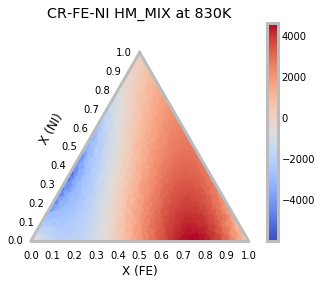

In [28]:
import matplotlib.pyplot as plt
from pycalphad.plot import triangular
from pycalphad import calculate

# some sample data, these could be from an equilibrium calculation or a property model.
# here we are calculating the mixing enthlapy of the FCC_A1 phase at 830K.
c = calculate(db, comps, 'FCC_A1', output='HM_MIX', T=830, P=101325, pdens=5000)

# Here we are getting the values from our plot.
xs = c.X.values[0, 0, :, 0]  # 1D array of FE compositions
ys = c.X.values[0, 0, :, 1]  # 1D array of NI compositions
zs = c.HM_MIX.values[0,0, :]  # 1D array of mixing enthalpies at these compositions

# when we imported the pycalphad.plot.triangular module, it made the 'triangular' projection available for us to use.
fig = plt.figure()
ax = fig.gca(projection='triangular')
ax.scatter(xs, ys, c=c.HM_MIX.values[0,0, :],
           cmap='coolwarm',
           linewidth=0.0)

# label the figure
ax.set_xlabel('X (FE)')
ax.set_ylabel('X (NI)')
ax.yaxis.label.set_rotation(60)  # rotate ylabel
ax.yaxis.set_label_coords(x=0.12, y=0.5)  # move the label to a pleasing position
ax.set_title('CR-FE-NI HM_MIX at 830K')

# set up the colorbar
cm = plt.cm.ScalarMappable(cmap='coolwarm')
cm.set_array(zs)
fig.colorbar(cm)